<a href="https://colab.research.google.com/github/chrisguti27/Notebooks/blob/main/Notebooks/AI/Machine%20Learning/Regresi%C3%B3n/BosquesAleatorios/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cd ..
!ls
!git clone https://github.com/chrisguti27/Notebooks.git

#Regresión con Bosques Aleatorios (Random Forest)

Los Bosques Aleatorios forman parte de los que se denomina **Aprendizaje Profundo**.

Consiste en tomar un algoritmo que realiza una tarea bien y replicarlo n-veces, en este caso los árboles de decisión, o tomar n-algoritmos diferentes y juntar el poder de todos ellos para formar un súper algoritmo.

De esta manera, los bosques aleatorios constituyen una versión mejorada de los árboles de decisión, ya que como resultado mejoran la precisión de la predicción.

*Tanto para regresión como para clasificación se usa el mismo enfoque de bosques aleatorios.*

##Algoritmo

1. Elegir el número de árboles aleatorio **Ntree**.
2. Elegir el número aleatorio K de puntos de datos del conjunto de entrenamiento. (i.e., MSE, error cuadrático medio)
3. Construir el árbol de decisión asociado a esos K puntos de datos.
4. Comparar el número total de árboles generados y comparar con **Ntree**, si es menor que **Ntree**, repetir pasos 2 y 3.
5. Para un nuevo punto de datos ($X$), hacer que cada uno de los **Ntree** árboles prediga el valor $Y$ para el punto en cuestión, basado en el promedio de todas las predicciones $Y$ de todos los **Ntree** árboles.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#-----------------IMPORT DATASET-----------------

dataset = pd.read_csv('/content/Notebooks/AI/Machine Learning/Regresión/BosquesAleatorios/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values 
y = dataset.iloc[:,2].values
#como el dataset es pequeño no tiene sentido separar en training y test

In [ ]:
#-------------AJUSTAR MODELO------------------
#*********obtener el modelo de regresión
from sklearn.ensemble import RandomForestRegressor
regression =  RandomForestRegressor(n_estimators = 300,random_state = 0 )# por defecto n_estimators = 100, 
#conforme se incrementa el número de árboles incrementa la precisión del modelo y a la vez el tiempo de cómputo necesario
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
regression.fit(X,y)

In [11]:
#----------------PREDICCIÓN-------------------
regression.predict([[6.5]])

array([160333.33333333])

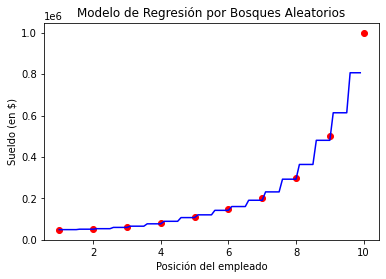

In [12]:
#plot
X_grid = np.arange(min(X),max(X),0.1)# para evitar que el gráfico salga a trozos
X_grid = X_grid.reshape(len(X_grid),1)
X_1 = X_grid #los X que se quieren predecir en el plot
plt.scatter(X, y, color = "red")
plt.plot(X_1, regression.predict(X_1), color = "blue")
plt.title("Modelo de Regresión por Bosques Aleatorios")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()